In [14]:
from Submod import *
from matplotlib import pyplot as plt
import os

In this notebook, we define the function "get_results" which tries the algorithm with every submodular functions defined for different corpus of texts. We can then compare computation times, and the score (ROUGE score)

In [3]:
path = 'OpinosisDataset1.0_0/topics/'
topics_file_names = os.listdir(path)

def get_result(budget = 50, r = 1):
    names = ['rouge_MMRs', 'rouge_MMR_doubles', 'rouge_subs', 
             't_MMRs', 't_MMR_doubles', 't_subs', 'nbr_sentences']
    arr = np.zeros((len(topics_file_names), 7))
    results = pd.DataFrame(arr,columns=names)
    i = 0
    n = len(topics_file_names)
    for topics_file_name in topics_file_names:
        #print(topics_file_name)
        sub_model = SubmodModel(topics_file_name)
        res = sub_model.compare(budget, r)
        nbr_sentences = sub_model.X_train_tf.shape[0]
#         print(res)
        for k in range(len(names)-1):
            results[names[k]].iloc[i] = res[k]
        results['nbr_sentences'].iloc[i] = nbr_sentences
        #print(results.iloc[i])
        i +=1
#         print("finish {}, {}/{}".format(topics_file_name, i, n))
    # print(results.mean())
    return results.mean(), results

In [17]:
budgets = [20, 40, 60, 80, 100]
rs = [0, 0.3, 0.5, 1, 1.5]
names = ['rouge_MMRs', 'rouge_MMR_doubles', 'rouge_subs', 't_MMRs', 't_MMR_doubles', 't_subs']
arr = np.zeros((len(topics_file_names), 6))

In [11]:


# print("########### Start Calculation for Different Budgets ###########")
# res_budgets = pd.DataFrame(arr,columns=names)
# i = 0
# for budget in budgets:
#     print("******* Start budget = {}, r = 1 ********".format(budget))
#     cur_result = get_result(budget, r = 1)
#     print(cur_result)
#     res_budgets.iloc[i] = cur_result[0]
#     i += 1

print("########### Start Calculation for Different Rs ###########")
res_rs = pd.DataFrame(arr,columns=names)
i = 0
for r in rs:
    print("******* Start budget = 50, r ={} ********".format(r))
    cur_result = get_result(budget = 50, r = r)
    print(cur_result)
    res_rs.iloc[i] = cur_result[0]
    cur_result[1].to_csv('results_Opinosis_r_{}.csv'.format(r))
    i += 1
res_rs.to_csv('results_Opinosis_r_opt.csv')

########### Start Calculation for Different Rs ###########
******* Start budget = 50, r =0 ********
(rouge_MMRs             0.350663
rouge_MMR_doubles      0.226379
rouge_subs             0.339274
t_MMRs                43.336795
t_MMR_doubles          1.435484
t_subs               303.238723
nbr_sentences        134.333333
dtype: float64,     rouge_MMRs  rouge_MMR_doubles  rouge_subs       t_MMRs  t_MMR_doubles  \
0     0.323232           0.101010    0.363636     0.752534       0.163898   
1     0.344000           0.312000    0.256000     6.362063       0.337784   
2     0.391304           0.318841    0.391304     1.062342       0.353781   
3     0.370690           0.301724    0.370690     0.970401       0.151906   
4     0.274510           0.196078    0.274510    13.386397       5.064019   
5     0.383721           0.069767    0.116279    42.357903       1.124961   
6     0.315436           0.080537    0.315436     1.640569       1.171834   
7     0.410256           0.166667    0.3974

(rouge_MMRs             0.365541
rouge_MMR_doubles      0.226379
rouge_subs             0.354741
t_MMRs                 9.861000
t_MMR_doubles          1.421826
t_subs               299.529976
nbr_sentences        134.333333
dtype: float64,     rouge_MMRs  rouge_MMR_doubles  rouge_subs      t_MMRs  t_MMR_doubles  \
0     0.404040           0.101010    0.323232    0.434510       0.156245   
1     0.256000           0.312000    0.272000    0.531231       0.296865   
2     0.405797           0.318841    0.391304    7.468492       0.281240   
3     0.370690           0.301724    0.370690    0.343739       0.156244   
4     0.352941           0.196078    0.294118  141.395292       4.999827   
5     0.372093           0.069767    0.360465    3.078017       1.109337   
6     0.315436           0.080537    0.275168    2.187425       1.140585   
7     0.410256           0.166667    0.384615    4.031109       0.531232   
8     0.359712           0.223022    0.294964    9.452796       0.343738   

(rouge_MMRs             0.356791
rouge_MMR_doubles      0.226379
rouge_subs             0.329965
t_MMRs                 8.444679
t_MMR_doubles          1.422438
t_subs               122.050604
nbr_sentences        134.333333
dtype: float64,     rouge_MMRs  rouge_MMR_doubles  rouge_subs     t_MMRs  t_MMR_doubles  \
0     0.363636           0.101010    0.373737   0.434892       0.156247   
1     0.256000           0.312000    0.256000   2.812403       0.281240   
2     0.391304           0.318841    0.326087   0.687477       0.281240   
3     0.379310           0.301724    0.362069   3.156142       0.140620   
4     0.352941           0.196078    0.352941  19.936806       5.031075   
5     0.302326           0.069767    0.302326  43.007149       1.093712   
6     0.328859           0.080537    0.328859   2.671784       1.156209   
7     0.320513           0.166667    0.282051   1.437448       0.546856   
8     0.309353           0.223022    0.251799   9.655916       0.359362   
9     0.4

In [9]:
res_budgets

,rouge_MMRs,rouge_MMR_doubles,rouge_subs,t_MMRs,t_MMR_doubles,t_subs
0,0.358423,0.358423,0.358423,0.358423,0.358423,0.358423
1,0.359813,0.359813,0.359813,0.359813,0.359813,0.359813
2,0.377356,0.377356,0.377356,0.377356,0.377356,0.377356
3,0.412554,0.412554,0.412554,0.412554,0.412554,0.412554
4,0.444425,0.444425,0.444425,0.444425,0.444425,0.444425
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
res_rs = pd.read_csv("results_Opinosis_r_opt.csv", sep = ",")

In [15]:
res_rs = res_rs[0:5]
res_rs

,Unnamed: 0,rouge_MMRs,rouge_MMR_doubles,rouge_subs,t_MMRs,t_MMR_doubles,t_subs
0,0,0.350663,0.226379,0.339274,43.336795,1.435484,303.238723
1,1,0.357923,0.226379,0.366723,14.424942,1.438369,307.174981
2,2,0.365541,0.226379,0.354741,9.861000,1.421826,299.529976
3,3,0.362048,0.226379,0.348702,41.340101,1.424277,66.623994
4,4,0.356791,0.226379,0.329965,8.444679,1.422438,122.050604


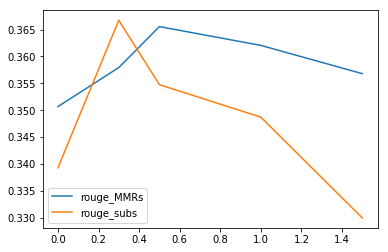

In [18]:
plt.plot(rs, res_rs["rouge_MMRs"], label = "rouge_MMRs")
plt.plot(rs, res_rs["rouge_subs"], label = "rouge_subs")
plt.legend()
plt.show()

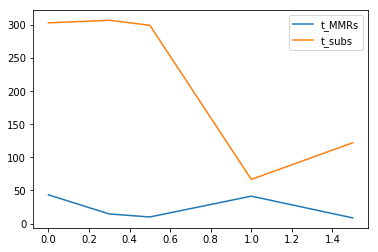

In [19]:
plt.plot(rs, res_rs["t_MMRs"], label = "t_MMRs")
plt.plot(rs, res_rs["t_subs"], label = "t_subs")
plt.legend()
plt.show()

In [40]:
res_r03 = pd.read_csv("results_Opinosis_r_0.3.csv", sep = ",")
res_r03

,Unnamed: 0,rouge_MMRs,rouge_MMR_doubles,rouge_subs,t_MMRs,t_MMR_doubles,t_subs,nbr_sentences
0,0,0.404040,0.101010,0.404040,0.511338,0.156245,0.828096,65.0
1,1,0.256000,0.312000,0.272000,0.593729,0.296864,2.421791,88.0
2,2,0.405797,0.318841,0.405797,7.530988,0.296865,22.155481,88.0
3,3,0.370690,0.301724,0.370690,0.359364,0.156245,0.796847,64.0
4,4,0.274510,0.196078,0.294118,294.988456,5.093574,320.910734,313.0
5,5,0.383721,0.069767,0.383721,42.529775,1.109335,153.729038,162.0
6,6,0.315436,0.080537,0.315436,1.640569,1.156208,7.671609,164.0
7,7,0.410256,0.166667,0.384615,6.452900,0.546856,5.343565,117.0
8,8,0.309353,0.223022,0.446043,0.421860,0.359364,3.406132,96.0
9,9,0.420455,0.136364,0.420455,1.515572,0.093747,3.687372,49.0


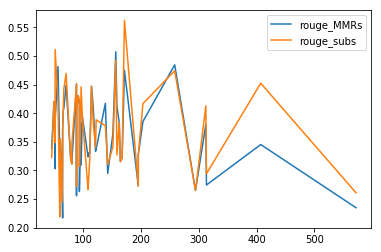

In [41]:
nbr_sent = np.array(res_r03["nbr_sentences"])
argsorted = np.argsort(nbr_sent)
nbr_sent_sorted = res_r03["nbr_sentences"][argsorted]
rouge_MMRs_sent = res_r03["rouge_MMRs"][argsorted]
rouge_subs_sent = res_r03["rouge_subs"][argsorted]

plt.plot(nbr_sent_sorted, rouge_MMRs_sent, label = "rouge_MMRs")
plt.plot(nbr_sent_sorted, rouge_subs_sent, label = "rouge_subs")
plt.legend()
plt.show()

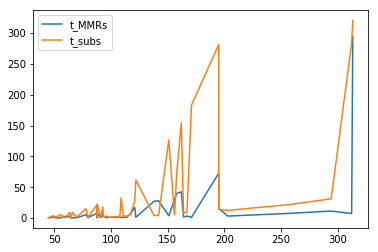

In [42]:
nbr_sent = np.array(res_r03["nbr_sentences"])
argsorted = np.argsort(nbr_sent)[:-2]
nbr_sent_sorted = res_r03["nbr_sentences"][argsorted]
rouge_MMRs_sent = res_r03["t_MMRs"][argsorted]
rouge_subs_sent = res_r03["t_subs"][argsorted]

plt.plot(nbr_sent_sorted, rouge_MMRs_sent, label = "t_MMRs")
plt.plot(nbr_sent_sorted, rouge_subs_sent, label = "t_subs")
plt.legend()
plt.show()

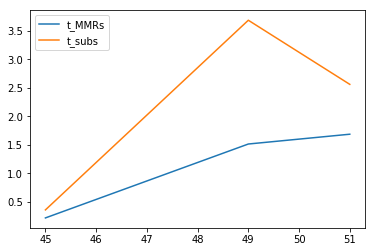

In [43]:
nbr_sent = np.array(res_r03["nbr_sentences"])
argsorted = np.argsort(nbr_sent)[0:3]
nbr_sent_sorted = res_r03["nbr_sentences"][argsorted]
rouge_MMRs_sent = res_r03["t_MMRs"][argsorted]
rouge_subs_sent = res_r03["t_subs"][argsorted]

plt.plot(nbr_sent_sorted, rouge_MMRs_sent, label = "t_MMRs")
plt.plot(nbr_sent_sorted, rouge_subs_sent, label = "t_subs")
plt.legend()
plt.show()

In [44]:
res_r03.groupby("nbr_sentences")
res_r03

,Unnamed: 0,rouge_MMRs,rouge_MMR_doubles,rouge_subs,t_MMRs,t_MMR_doubles,t_subs,nbr_sentences
0,0,0.404040,0.101010,0.404040,0.511338,0.156245,0.828096,65.0
1,1,0.256000,0.312000,0.272000,0.593729,0.296864,2.421791,88.0
2,2,0.405797,0.318841,0.405797,7.530988,0.296865,22.155481,88.0
3,3,0.370690,0.301724,0.370690,0.359364,0.156245,0.796847,64.0
4,4,0.274510,0.196078,0.294118,294.988456,5.093574,320.910734,313.0
5,5,0.383721,0.069767,0.383721,42.529775,1.109335,153.729038,162.0
6,6,0.315436,0.080537,0.315436,1.640569,1.156208,7.671609,164.0
7,7,0.410256,0.166667,0.384615,6.452900,0.546856,5.343565,117.0
8,8,0.309353,0.223022,0.446043,0.421860,0.359364,3.406132,96.0
9,9,0.420455,0.136364,0.420455,1.515572,0.093747,3.687372,49.0


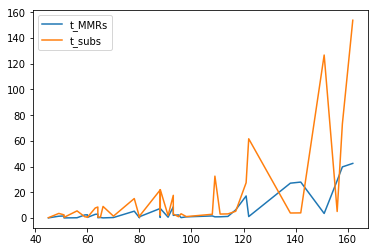

In [63]:

nbr_sent = np.array(res_r03["nbr_sentences"])
argsorted = np.argsort(nbr_sent)[:-12]
nbr_sent_sorted = np.array(res_r03["nbr_sentences"][argsorted])
rouge_MMRs_sent = np.array(res_r03["t_MMRs"][argsorted])
rouge_subs_sent = np.array(res_r03["t_subs"][argsorted])

plt.plot(nbr_sent_sorted, rouge_MMRs_sent, label = "t_MMRs")
plt.plot(nbr_sent_sorted, rouge_subs_sent, label = "t_subs")
plt.legend()
plt.show()

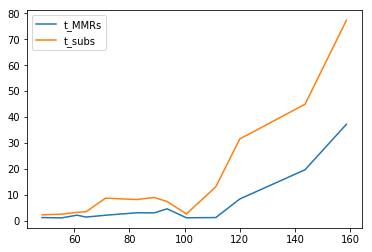

In [64]:
x = np.mean(nbr_sent_sorted.reshape(-1, 3), axis=1)
y1 = np.mean(rouge_MMRs_sent.reshape(-1, 3), axis=1)
y2 = np.mean(rouge_subs_sent.reshape(-1, 3), axis=1)

plt.plot(x, y1, label = "t_MMRs")
plt.plot(x, y2, label = "t_subs")
plt.legend()
plt.show()

NameError: name 'PriorityQueue' is not defined